In [1]:
import numpy as np

In [36]:
from scipy import stats

## Задача 1

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

In [4]:
x = np.array([[1.22401313, 2.30868478, 3.03636353, 2.69287214],
             [-0.18757272, 1.30337355, 5.12093014, 3.46363202],
             [-0.81094525, 1.82463398, 5.79686488, 1.86159445],
             [0.75129018, 2.67392052, 3.65529809, 1.66746094],
             [0.00972362, 1.97367255, 2.50594319, 1.69755173],
             [-0.62972637, 0.77750764, 2.84124027, 4.54410559],
             [2.29536229, 1.81206697, 1.95026215, 1.51874636],
             [0.0920418 , 2.26971361, 7.47708735, 2.61081203],
             [2.39252799, 3.17563985, 3.61420599, 5.10773362],
             [0.54983815, 2.87988651, 1.65752765, 1.59635987]])

y = np.array([9.26193358,
              9.700363,
              8.67214805,
              8.74796974,
              6.18689108,
              7.53312713,
              7.57643777,
              12.44965478,
              14.29010746,
              6.68361218])

In [34]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [ ]:
Создаём функцию определения коэффициентов линеаризации, а затем вычисления коэффициента детерминации.

In [28]:
def linearis_quality(mx, my, ftr_a, ftr_b):
    ones = np.ones((mx.shape[0], 1))
    clm = [ftr_a, ftr_b]
    mx = mx[:, clm]
    mx = np.hstack((ones, mx))
    XTX = mx.T.dot(mx)
    # np.linalg.det(XTX)
    XTX_inv = np.linalg.inv(XTX)
    b = XTX_inv.dot(mx.T).dot(my)
    z2 = mx.dot(b)
    R2 = 1 - ((my - z2)**2).sum() / sum_of_squares(my)
    return R2

In [30]:
r1 = linearis_quality(x, y, 0, 1)
r2 = linearis_quality(x, y, 0, 2)
r3 = linearis_quality(x, y, 0, 3)
r4 = linearis_quality(x, y, 1, 2)
r5 = linearis_quality(x, y, 1, 3)
r6 = linearis_quality(x, y, 2, 3)
print(r1, r2, r3, r4, r5, r6)

0.18113594742585215 0.7634246238793152 0.45329667831440756 0.5479482734039012 0.6062055761129932 0.6224419876505322


In [35]:
k1 = 2
k2 = 10 - 2 - 1

In [37]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

In [44]:
def znach(R, K1, K2):
    F = (R / K1) / ((1 - R) / K2)
    return F

In [45]:
f1 = znach(r1, k1, k2)
f2 = znach(r2, k1, k2)
f3 = znach(r3, k1, k2)
f4 = znach(r4, k1, k2)
f5 = znach(r5, k1, k2)
f6 = znach(r6, k1, k2)
print(f1, f2, f3, f4, f5, f6)

0.7742137586789185 11.29443912292265 2.9020097577033566 4.242476787677875 5.387886134731737 5.770098595498481


## Задача 2

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. (доп) Посчитать среднюю ошибку аппроксимации

In [95]:
slr1 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scr1 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [79]:
slr = np.array([[35, 45, 190, 200, 40, 70, 54, 150, 120, 110]])

scr = np.array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [96]:
b1 = (np.mean(slr1 * scr1) - np.mean(slr1) * np.mean(scr1)) / (np.mean(slr1 ** 2) - np.mean(slr1) ** 2)
b0 = np.mean(scr1) - b1 * np.mean(slr1)

b0, b1

(444.1773573243596, 2.620538882402765)

In [ ]:
Коэффициенты по методу квадратов

In [80]:
slrt = slr.transpose()
scrt = scr.transpose()

In [81]:
ones = np.ones((slrt.shape[0], 1))

In [82]:
x = np.hstack((ones, slrt))

In [85]:
XTX2 = x.T.dot(x)
XTX2_inv = np.linalg.inv(XTX2)
b = XTX2_inv.dot(x.T).dot(scrt)
print(b)

[[444.17735732]
 [  2.62053888]]


In [ ]:
Определяем коэффициент детерминации

In [91]:
z3 = x.dot(b)
R3 = 1 - ((scrt - z3)**2).sum() / sum_of_squares(scrt)
R3

0.7876386635293685

In [ ]:
Построение графика линеаризации

In [92]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

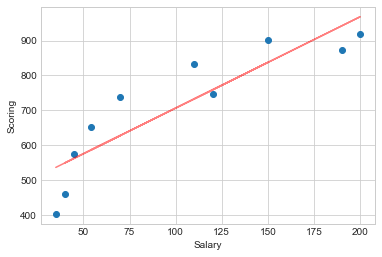

In [100]:
ox = slr1
oy = b0 + b1 * ox

plt.scatter(slr1, scr1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('Salary')
plt.ylabel('Scoring');

In [104]:
k0 = 1
k1 = slr1.shape[0] - k0 - 1

In [106]:
ff = znach(R3, k0, k1)
ff

29.67164085966449

In [107]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k0, k1)
t

5.317655071578714